# Fitting with lmfit and python

In [1]:
%matplotlib notebook
import notebook
import ipywidgets
import matplotlib.pyplot as plt

# Simple Power Law Fit using lmfit

<IPython.core.display.Javascript object>


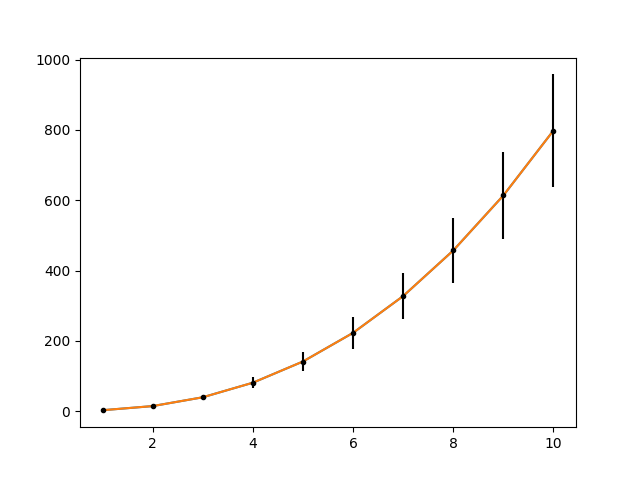

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  2.5248904   14.28293697  39.35914606  80.7964927  141.14566408
 222.64895263 327.33137181 457.05398307 613.54836643 798.44044963]
[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 10
    # variables        = 2
    chi-square         = 2.9855e-26
    reduced chi-square = 3.7319e-27
    Akaike info crit   = -606.760160
    Bayesian info crit = -606.154990
[[Variables]]
    exponent:   2.50000000 +/- 3.1323e-16 (0.00%) (init = 1)
    amplitude:  2.52489040 +/- 1.7294e-15 (0.00%) (init = 798.4404)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.997

Fitted values {'exponent': 2.5000000000000004, 'amplitude': 2.5248903968431695}
Residuals: [-2.22044605e-15 -1.06581410e-14 -2.13162821e-14 -1.42108547e-14
  0.00000000e+00 -5.68434189e-14  0.00000000e+00 -1.13686838e-13
  0.00000000e+00 -1.13686838e-13]
Fit success: True
Parame

<ErrorbarContainer object of 3 artists>

In [2]:
# Here's a simple power law fit using lmfit

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import lmfit

# Create dummy data
x=np.arange(10)+1.0
a=3.0
b=2.5
y=a*np.power(x,b)*np.abs(np.random.normal(1.0,0.9,1))
yerr=y*0.2

plt.plot(x,y)
print(x)
print(y)
# Fit the data to a power law model
model = lmfit.models.PowerLawModel()
params = model.guess(y)
#out = model.fit(y,params,x=x, fit_kws={'nan_policy': 'omit'}) - obsoleted
# by new version of scipy, yuck.

out = model.fit(y,params,x=x)

# Show the results of the fit
print(out.fit_report())
print('Fitted values',out.best_values)
print('Residuals:',out.residual)
print('Fit success:',out.success)
print(out.params)
# Plot the results
plt.plot(x,out.best_fit) # Plot the Fit
plt.errorbar(x,y,yerr=yerr,fmt='k.') #Overplot the Data

In [3]:
# Here are some useful things to look at

print(out.best_values)
print(out.residual)
print(out.success)
print(out.params)
print(out.init_fit)

{'exponent': 2.5000000000000004, 'amplitude': 2.5248903968431695}
[-2.22044605e-15 -1.06581410e-14 -2.13162821e-14 -1.42108547e-14
  0.00000000e+00 -5.68434189e-14  0.00000000e+00 -1.13686838e-13
  0.00000000e+00 -1.13686838e-13]
True
Parameters([('exponent', <Parameter 'exponent', value=2.5000000000000004 +/- 3.13e-16, bounds=[-inf:inf]>), ('amplitude', <Parameter 'amplitude', value=2.5248903968431695 +/- 1.73e-15, bounds=[-inf:inf]>)])
[ 798.44044963 1596.88089926 2395.3213489  3193.76179853 3992.20224816
 4790.64269779 5589.08314742 6387.52359706 7185.96404669 7984.40449632]


In [4]:
# How to access the individual fit parameters
print('amplitude =',out.best_values['amplitude'], 'exponent=',out.best_values['exponent'])
print(str(out.params['amplitude'].stderr))

amplitude = 2.5248903968431695 exponent= 2.5000000000000004
1.7294001828220002e-15


# Powerlaw fit with Error Bars (Might work), Bounds (works), and Parameter Limits(works)

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 10
    # variables        = 2
    chi-square         = 0.00000000
    reduced chi-square = 0.00000000
    Akaike info crit   = -inf
    Bayesian info crit = -inf
##  Warning: uncertainties could not be estimated:
    exponent:   at initial value
    exponent:   at boundary
    amplitude:  at initial value
[[Variables]]
    exponent:   2.50000000 (init = 2.5)
    amplitude:  3.00000000 (init = 3)

Fitted values {'exponent': 2.5, 'amplitude': 3.0}
Residuals: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fit success: True


<IPython.core.display.Javascript object>


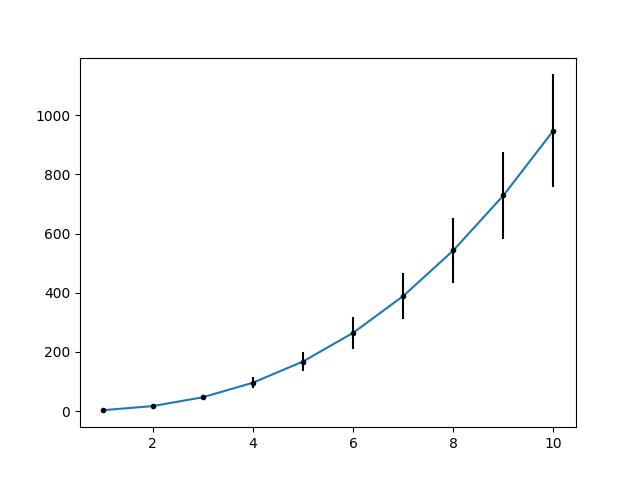

In [5]:
# Here's a simple power law fit using lmfit

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import lmfit

# Create dummy data
x=np.arange(10)+1.0
a=3.0
b=2.5
y=a*np.power(x,b)
yerr=y*0.2

# Fit the data to a power law model
weights= 1.0/yerr
model = lmfit.models.PowerLawModel()
params = model.guess(y)
model.set_param_hint('amplitude', value=3.0)
model.set_param_hint('exponent',  value=2.5)
params['amplitude'].set(min=2.8,max=3.0)
params['exponent'].set(min=2.5,max=4.0)

out = model.fit(y,params,x=x, weights=weights)
#out = model.fit(y,params,x=x)

print(out.fit_report())
print('Fitted values',out.best_values)
print('Residuals:',out.residual)
print('Fit success:',out.success)

# Plot the results
plt.figure()
plt.plot(x,out.best_fit) # Plot the Fit
plt.errorbar(x,y,yerr=yerr,fmt='k.') #Overplot the Data
plt.show()

In [6]:
params['amplitude']

<Parameter 'amplitude', 3.0, bounds=[2.8:3.0]>

# Do the same thing, but now fit to two models that are summed (seems to work now)

[[Model]]
    (Model(linear) + Model(powerlaw))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 10
    # variables        = 4
    chi-square         = 1.5777e-29
    reduced chi-square = 2.6295e-30
    Akaike info crit   = -678.215709
    Bayesian info crit = -677.005368
##  Warning: uncertainties could not be estimated:
    exponent:   at initial value
    exponent:   at boundary
    amplitude:  at initial value
[[Variables]]
    intercept:  8.00000000 (init = 0)
    slope:      4.00000000 (init = 0)
    exponent:   2.50000000 (init = 2.5)
    amplitude:  3.00000000 (init = 3)



<IPython.core.display.Javascript object>


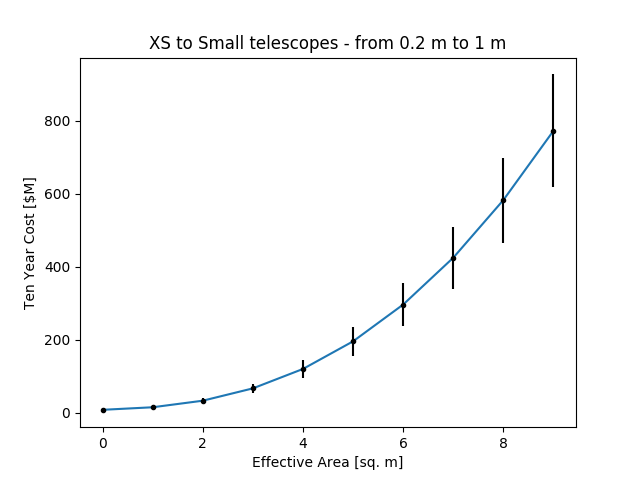

In [6]:
# fit to two models that are summed
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import lmfit

# Create dummy data
x=np.arange(10)
a=3.0
b=2.5
c=4
d=8
y=a*np.power(x,b) + c*x + d
yerr=y*0.2

# Fit the data to a sum of two models using lmfit Model approach
modelA = lmfit.models.LinearModel()
paramsA = modelA.guess(y)
modelB = lmfit.models.PowerLawModel()
paramsB = modelB.guess(y)

model = modelA + modelB
params = paramsA + paramsB

weights= 1.0/yerr

## Set bounds on the parameters to help it converge
params['amplitude'].set(min=2.8,max=3.0)
params['exponent'].set(min=2.5,max=4.0)

#small_out = model.fit(y,params,x=x,weights=weights)
small_out = model.fit(y,params,x=x)

# Print the results of the fit
print(small_out.fit_report())

# Plot the results
plt.figure()
plt.errorbar(x,y,yerr=yerr,fmt='k.') #data
plt.plot(x,small_out.best_fit)
plt.xlabel('Effective Area [sq. m]')
plt.ylabel('Ten Year Cost [$M]')
plt.title('XS to Small telescopes - from 0.2 m to 1 m')
plt.show()
#plt.axis([0, 0.8, 0, 10])

[0.1 1.1 2.1 3.1 4.1 5.1 6.1 7.1 8.1 9.1] [10.          0.90909091  0.47619048  0.32258065  0.24390244  0.19607843
  0.16393443  0.14084507  0.12345679  0.10989011]
[[Model]]
    (Model(linear) + Model(powerlaw))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 10
    # variables        = 4
    chi-square         = 0.03316205
    reduced chi-square = 0.00552701
    Akaike info crit   = -49.0893433
    Bayesian info crit = -47.8790029
[[Variables]]
    intercept: -0.55804654 +/- 0.00000000 (0.00%) (init = 0)
    slope:      0.04876383 +/- 0.00000000 (0.00%) (init = 0)
    exponent:  -0.80000000 +/- 0.00000000 (0.00%) (init = -0.8)
    amplitude:  1.67077184 +/- 0.00000000 (0.00%) (init = 10)



<IPython.core.display.Javascript object>


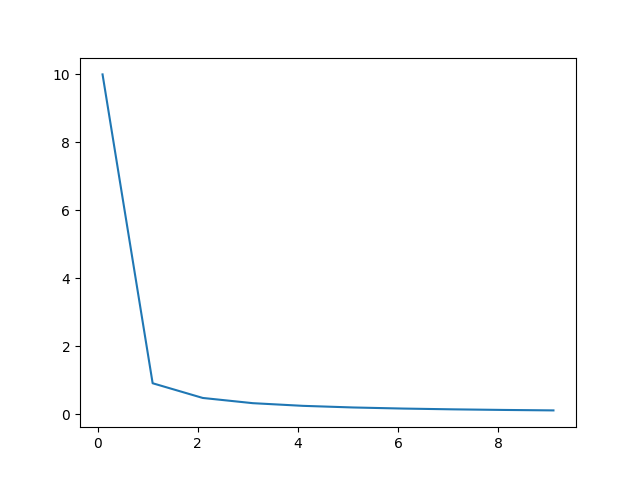

<IPython.core.display.Javascript object>


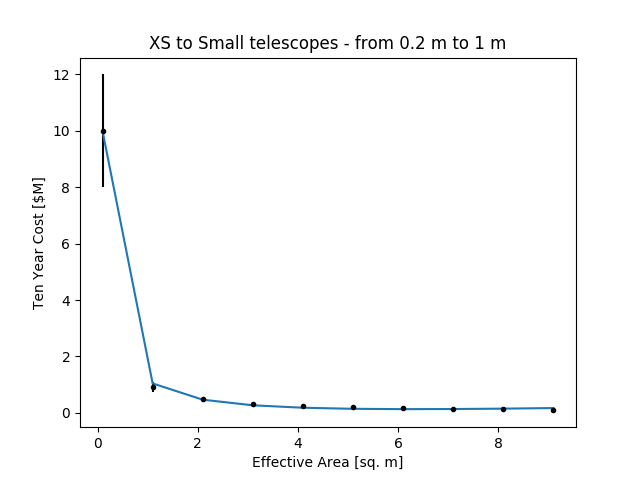

In [18]:
# fit to two models that are summed
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import lmfit

# Create dummy data
x=np.arange(10)+0.1
a=1.0
b=-1.0
#c=4
#d=8
y=a*np.power(x,b) #+ c*x + d
yerr=y*0.2
print(x,y)
# Fit the data to a sum of two models using lmfit Model approach
modelA = lmfit.models.LinearModel()
paramsA = modelA.guess(y)
modelB = lmfit.models.PowerLawModel()
paramsB = modelB.guess(y)
modelC = lmfit.models.ExponentialModel()
paramsC = modelC.guess(y)
model = modelA + modelB
params = paramsA + paramsB

weights= 1.0/yerr

## Set bounds on the parameters to help it converge
#params['amplitude'].set(min=2.8,max=3.0)
params['exponent'].set(min=-1.2,max=-0.8)

#small_out = model.fit(y,params,x=x,weights=weights)
small_out = model.fit(y,params,x=x)

# Print the results of the fit
print(small_out.fit_report())

# Plot the results
plt.figure()
plt.plot(x,y)
plt.show()
plt.figure()
plt.errorbar(x,y,yerr=yerr,fmt='k.') #data
plt.plot(x,small_out.best_fit)
plt.xlabel('Effective Area [sq. m]')
plt.ylabel('Ten Year Cost [$M]')
plt.title('XS to Small telescopes - from 0.2 m to 1 m')
plt.show()
#plt.axis([0, 0.8, 0, 10])

# Let's use Pandas to read in a data file, sort the data by a particular column, and select a particular subset of data to fit with a Quadratic Model

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 12
    # variables        = 3
    chi-square         = 0.14971859
    reduced chi-square = 0.01663540
    Akaike info crit   = -46.6068538
    Bayesian info crit = -45.1521339
[[Variables]]
    c:  3.24947830 +/- 0.06915693 (2.13%) (init = 0)
    b: -1.03516655 +/- 0.62020793 (59.91%) (init = 0)
    a:  5.91369602 +/- 0.88590003 (14.98%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, a) = -0.944
    C(c, b) = -0.919
    C(c, a) =  0.813



<IPython.core.display.Javascript object>


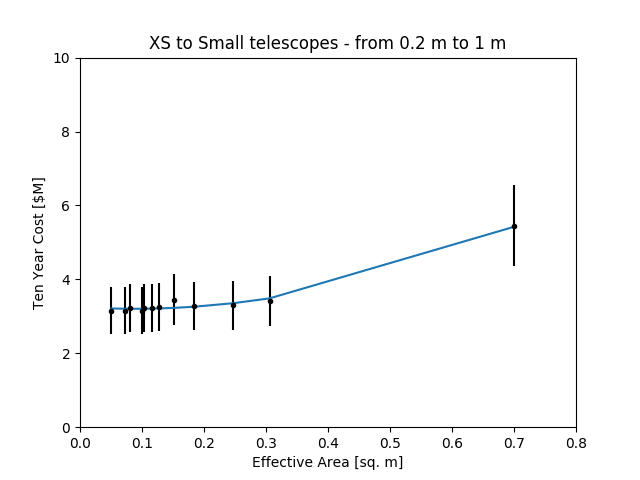

In [20]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import lmfit

# Read in the CSV file (made with MS Excel and saving with the CSV type)
fn = "telescopes.csv"
data=pd.read_csv(fn)

# Sort by a particular column
#data_sorted = data.sort('Area')
data_sorted = data.sort_values('Area')


# Select only the data we want to work with
x = data_sorted[data_sorted['Category'].eq('XS') | data_sorted['Category'].eq('S') 
               | data_sorted['Name'].eq('LCOGT 1-m') ]['Area']
y = data_sorted[data_sorted['Category'].eq('XS') | data_sorted['Category'].eq('S')
               | data_sorted['Name'].eq('LCOGT 1-m')]['Ten Year Cost']

# Create an arbitrary error for each point of 20%
yerr = 0.20*y

# Fit the data to a power law model using lmfit Model approach
model = lmfit.models.QuadraticModel()
params = model.guess(y)
weights= 1.0/yerr
small_out = model.fit(y,params,x=x,weights=weights)

# Print the results of the fit
print(small_out.fit_report())

# Plot the results
plt.figure()
plt.errorbar(x,y,yerr=yerr,fmt='k.') #data
plt.plot(x,small_out.best_fit)
plt.xlabel('Effective Area [sq. m]')
plt.ylabel('Ten Year Cost [$M]')
plt.title('XS to Small telescopes - from 0.2 m to 1 m')
plt.axis([0, 0.8, 0, 10])
plt.show()

In [21]:
## How to access the individual fit parameters
print('a =',small_out.best_values['a'])
print('stderr a=',small_out.params['a'].stderr, 'fractional error = ', np.absolute(small_out.params['a'].stderr/a))

a = 5.913696017360863
stderr a= 0.8859000315739297 fractional error =  0.8859000315739297
